# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
def warn(*args, **kwargs):
    pass

import warnings
warnings.warn = warn

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [3]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [5]:
# Write your code here

print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])

Number of rows: 1898
Number of columns: 9


#### Observations:
There are 1898 rows and 9 columns in the dataframe.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [6]:
# Use info() to print a concise summary of the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 103.9+ KB


#### Observations:
1. 'order_id', 'customer_id', 'food_preparation_time', and 'delivery_time' are integer.
2. 'restaurant_name', 'cuisine_type', 'day_of_the_week', and 'rating' are object (string). 
3. 'cost_of_the_order' is float.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [7]:
# Write your code here

print('Count of missing values in each column:')
print(df.isnull().sum())

Count of missing values in each column:
order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


#### Observations:
There are no missing values in the data.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [8]:
# Write your code here

print('Minimal Food Preparation Time:', df.describe().loc['min', 'food_preparation_time'])
print('Average Food Preparation Time:', df.describe().loc['mean', 'food_preparation_time'])
print('Maximal Food Preparation Time:', df.describe().loc['max', 'food_preparation_time'])

Minimal Food Preparation Time: 20.0
Average Food Preparation Time: 27.371970495258168
Maximal Food Preparation Time: 35.0


#### Observations:
1. The minimal food preparation time is 20 minutes.
2. The average food preparation time is about 27.37 minutes.
3. The maximal food preparation time is 35 minutes.

### **Question 5:** How many orders are not rated?

In [9]:
# Write the code here


print('Orders not rated:', len(df[df['rating'] == 'Not given']))

Orders not rated: 736


#### Observations:
736 orders are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

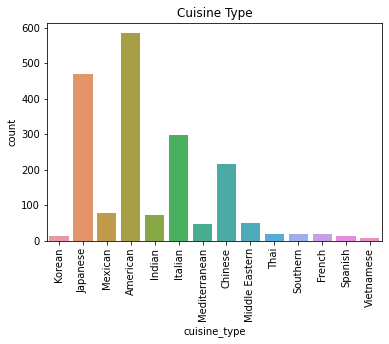

In [10]:
# Write the code here

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='cuisine_type')
plt.xticks(rotation=90)
plt.title('Cuisine Type')

plt.show()

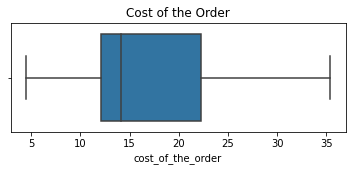

In [11]:
plt.figure(figsize=(6,2))
sns.boxplot(data=df, x='cost_of_the_order')
# sns.histplot(data=df, x='cost_of_the_order')
plt.title('Cost of the Order')

plt.show()

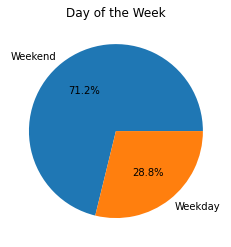

In [12]:
df_day_of_the_week = df['day_of_the_week'].value_counts()

plt.figure(figsize=(6,4))
plt.pie(df_day_of_the_week, labels=df_day_of_the_week.index, autopct='%1.1f%%')
plt.title('Day of the Week')

plt.show()

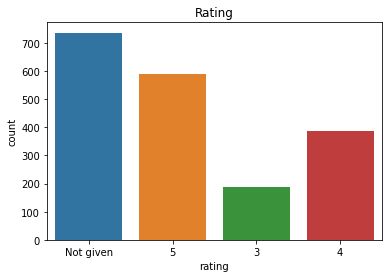

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='rating')
plt.title('Rating')

plt.show()

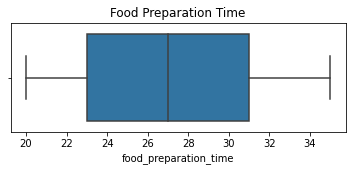

In [14]:
plt.figure(figsize=(6,2))
sns.boxplot(data=df, x='food_preparation_time')
plt.title('Food Preparation Time')

plt.show()

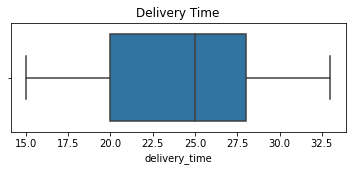

In [15]:
plt.figure(figsize=(6,2))
sns.boxplot(data=df, x='delivery_time')
plt.title('Delivery Time')

plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [16]:
# Write the code here

print('Number of Orders:')
print(df['restaurant_name'].value_counts().head())

Number of Orders:
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


#### Observations:
'Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi', 'Blue Ribbon Fried Chicken', and 'Parm' are the top 5 restaurants with the highest number of orders.

### **Question 8**: Which is the most popular cuisine on weekends?

In [17]:
# Write the code here

df_weekend = df[df['day_of_the_week'] == 'Weekend']
print('The most popular cuisine type on weekends:', df_weekend['cuisine_type'].value_counts().index[0])

The most popular cuisine type on weekends: American


#### Observations:
The most popular cuisine type on weekends is American.

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [18]:
# Write the code here

print('Percentage of orders costing more than 20 dollars:', len(df[df['cost_of_the_order'] > 20]) / len(df) * 100, "%")

Percentage of orders costing more than 20 dollars: 29.24130663856691 %


#### Observations:
About 29.24% of orders cost more than 20 dollars.

### **Question 10**: What is the mean order delivery time?

In [19]:
# Write the code here

print('Mean Order Delivery Time:', df['delivery_time'].mean())

Mean Order Delivery Time: 24.161749209694417


#### Observations:
The mean order delivery time is about 24.16 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [20]:
# Write the code here
print('Top 3 Customer IDs and Their Numbers of Orders')
print(df['customer_id'].value_counts()[:3])

Top 3 Customer IDs and Their Numbers of Orders
52832    13
47440    10
83287     9
Name: customer_id, dtype: int64


#### Observations:
The top 3 most frequent customers are 52832, 47440, and 83287, who placed 13, 10, and 9 orders, respectively.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

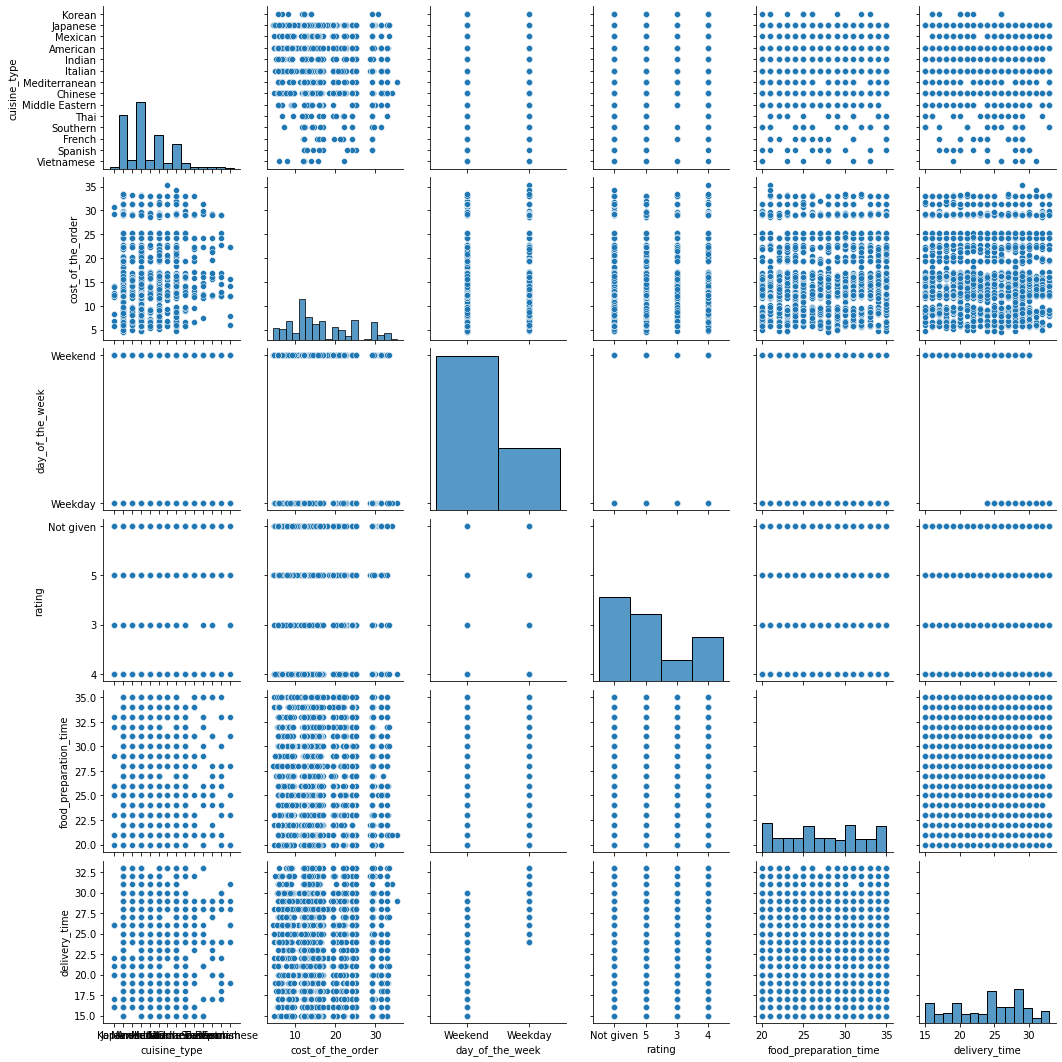

In [21]:
# Write the code here

sns.pairplot(data=df, vars=['cuisine_type', 'cost_of_the_order', 'day_of_the_week', 'rating', 'food_preparation_time', 'delivery_time'])

plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [22]:
# Write the code here

df_rating = df[df['rating'] != 'Not given'] # exclude the rows with a rating of 'Not given'
df_rating['rating'] = df_rating['rating'].astype('int64') # convert data type of 'rating' from object to integer

res_50more = df_rating['restaurant_name'].value_counts() > 50 # the criterion of having a rating count of more than 50
res_4greater = df_rating.groupby('restaurant_name')['rating'].mean() > 4 # the criterion of having the average rating greater than 4

res_list = []
rating_count = []
avg_rating = []

for i in df_rating['restaurant_name'].unique(): # iterate through all the restaurants names
    if res_50more[i] and res_4greater[i]: # check if the iterated restaurant meets the two criteria
        res_list.append(i)
        rating_count.append(df_rating['restaurant_name'].value_counts()[i])
        avg_rating.append(df_rating.groupby('restaurant_name')['rating'].mean()[i])
        
df_res = pd.DataFrame({'Restaurant Name':res_list, 'Rating Count':rating_count, 'Average Rating':avg_rating})
df_res

,Restaurant Name,Rating Count,Average Rating
0,Blue Ribbon Fried Chicken,64,4.328125
1,Shake Shack,133,4.278195
2,Blue Ribbon Sushi,73,4.219178
3,The Meatball Shop,84,4.511905


#### Observations:
'Blue Ribbon Fried Chicken', 'Shake Shack', 'Blue Ribbon Sushi', and 'The Meatball Shop' fulfill the criteria to get the promotional offer.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [23]:
# Write the code here

df_20 = df[df['cost_of_the_order'] > 20]
df_05 = df[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)]

net_revenue = df_20['cost_of_the_order'].sum() * 0.25 + df_05['cost_of_the_order'].sum() * 0.15
print('Net Revenue:', net_revenue)

Net Revenue: 6166.303


#### Observations:
The net revenue generated by the company across all orders is 6166.303 dollars.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [24]:
# Write the code here

df['total_time'] = df['food_preparation_time'] + df['delivery_time']
total_time_over_60 = df[df['total_time'] > 60]

print('Orders take more than 60 minutes:', len(total_time_over_60) / len(df) * 100, '%')

Orders take more than 60 minutes: 10.537407797681771 %


#### Observations:
About 10% of orders take more than 60 minutes to get delivered from the time the order is placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [25]:
# Write the code here

print(df.groupby('day_of_the_week')['delivery_time'].mean())

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


#### Observations:
The mean delivery time is 28.34 minutes on weekdays and 22.47 minutes on weekends.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
*  A considerable number of orders are not given rating.
*  There are no obvious relations between each two variables according to the pairplot.
*  Orders on weekends occupy 71% of total.
*  American cuisine is the most popular cuisine type on weekends.


### Recommendations:

*  Enhancing the willingness of giving a feedback rating may improve the understanding of the business.
*  Other variables should be collected for the analysis.
*  The company may focus more on weekends and American cuisine.

---